<a href="https://colab.research.google.com/github/Marcelo21006/loan_approval/blob/main/Loan_approval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_csv(r'/loan_data (1).csv')

In [8]:
df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1


In [15]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from scipy.sparse import issparse


Epoch 1/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - kl_loss: 0.0070 - loss: 0.4425 - reconstruction_loss: 0.4356
Epoch 2/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 0.0020 - loss: 0.4198 - reconstruction_loss: 0.4178
Epoch 3/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 0.0013 - loss: 0.4169 - reconstruction_loss: 0.4156
Epoch 4/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - kl_loss: 0.0010 - loss: 0.4153 - reconstruction_loss: 0.4142
Epoch 5/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0013 - loss: 0.4142 - reconstruction_loss: 0.4129
Epoch 6/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0026 - loss: 0.4130 - reconstruction_loss: 0.4104
Epoch 7/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0131 - loss: 0.4061 - reconstruction_loss: 0.3930
Epoch 8/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - kl_loss: 0.0277 - loss: 0.3961 - reconstruction_loss: 0.3683
Epoch 9/50
176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - kl_loss: 0.0285 - loss: 0

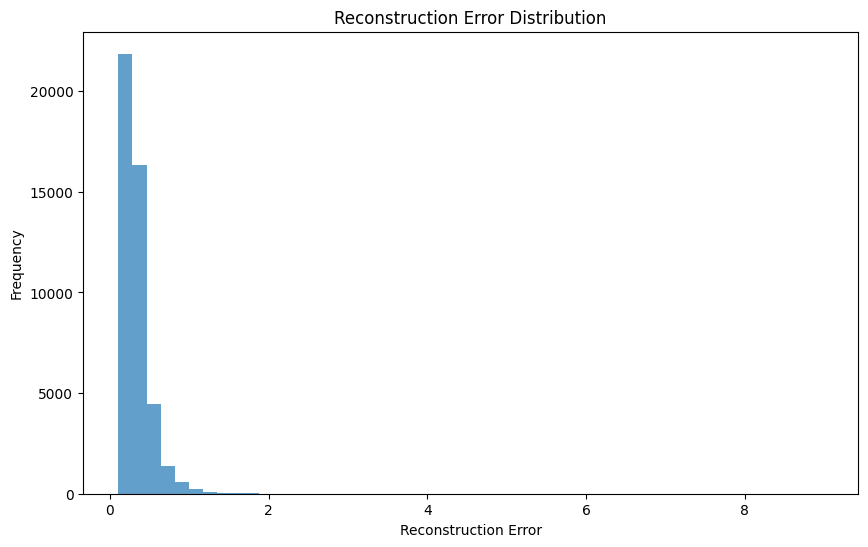

In [21]:
class VariationalAutoencoder:
    def __init__(self, input_dim, latent_dim=10, dtype=tf.float32):

        self.input_dim = input_dim
        self.latent_dim = latent_dim
        self.dtype = dtype
        self.model = None
        self.encoder = None
        self.decoder = None

    def sampling(self, args):

        z_mean, z_log_var = args

        z_mean = tf.cast(z_mean, self.dtype)
        z_log_var = tf.cast(z_log_var, self.dtype)

        batch = tf.keras.backend.shape(z_mean)[0]

        epsilon = tf.keras.backend.random_normal(
            shape=(batch, self.latent_dim),
            dtype=self.dtype
        )

        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

    def build_vae(self):
        # Encoder
        inputs = keras.layers.Input(shape=(self.input_dim,), dtype=self.dtype)

        # Encoder layers
        x = keras.layers.Dense(
            256, activation='relu',
            kernel_regularizer=keras.regularizers.l2(0.001),
            dtype=self.dtype
        )(inputs)
        x = keras.layers.BatchNormalization(dtype=self.dtype)(x)
        x = keras.layers.Dropout(0.3)(x)

        x = keras.layers.Dense(
            128, activation='relu',
            kernel_regularizer=keras.regularizers.l2(0.001),
            dtype=self.dtype
        )(x)
        x = keras.layers.BatchNormalization(dtype=self.dtype)(x)
        x = keras.layers.Dropout(0.3)(x)

        x = keras.layers.Dense(64, activation='relu', dtype=self.dtype)(x)

        # Latent space layers
        z_mean = keras.layers.Dense(self.latent_dim, name='z_mean', dtype=self.dtype)(x)
        z_log_var = keras.layers.Dense(self.latent_dim, name='z_log_var', dtype=self.dtype)(x)

        # Sampling layer
        z = keras.layers.Lambda(
            self.sampling,
            output_shape=(self.latent_dim,),
            name='z',
            dtype=self.dtype
        )([z_mean, z_log_var])

        # Encoder model
        encoder = keras.Model(inputs, [z_mean, z_log_var, z], name='encoder')

        # Decoder
        latent_inputs = keras.layers.Input(shape=(self.latent_dim,))

        # Decoder layers
        y = keras.layers.Dense(64, activation='relu')(latent_inputs)
        y = keras.layers.Dense(128, activation='relu')(y)
        y = keras.layers.Dense(256, activation='relu')(y)

        # Reconstruction layer
        outputs = keras.layers.Dense(self.input_dim, activation='linear')(y)

        # Decoder model
        decoder = keras.Model(latent_inputs, outputs, name='decoder')

        # Custom VAE model
        class VAEModel(keras.Model):
            def __init__(self, encoder, decoder, **kwargs):
                super().__init__(**kwargs)
                self.encoder = encoder
                self.decoder = decoder
                # Define MSE loss function
                self.mse_loss = tf.keras.losses.MeanSquaredError()

            def train_step(self, data):
                x = data

                with tf.GradientTape() as tape:
                    # Encode and decode
                    z_mean, z_log_var, z = self.encoder(x)
                    reconstruction = self.decoder(z)

                    # Reconstruction loss using MSE loss object
                    reconstruction_loss = self.mse_loss(x, reconstruction)

                    # KL Divergence loss
                    kl_loss = -0.5 * tf.reduce_mean(
                        1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var)
                    )

                    # Total loss
                    total_loss = reconstruction_loss + kl_loss

                # Compute and apply gradients
                grads = tape.gradient(total_loss, self.trainable_weights)
                self.optimizer.apply_gradients(zip(grads, self.trainable_weights))

                return {
                    "loss": total_loss,
                    "reconstruction_loss": reconstruction_loss,
                    "kl_loss": kl_loss
                }

        # Create VAE model
        vae = VAEModel(encoder, decoder)
        vae.compile(optimizer=keras.optimizers.Adam())

        return vae, encoder, decoder

    def fit(self, X, epochs=50, batch_size=256):

        # Build the model
        self.model, self.encoder, self.decoder = self.build_vae()

        # Early stopping
        early_stopping = keras.callbacks.EarlyStopping(
            monitor='loss',
            patience=10,
            restore_best_weights=True
        )

        # Train the model
        history = self.model.fit(
            X,
            epochs=epochs,
            batch_size=batch_size,
            shuffle=True,
            callbacks=[early_stopping]
        )

        return history

    def detect_anomalies(self, X, threshold_percentile=95):

        # Encode and decode the input
        z_mean, _, z = self.encoder.predict(X)
        reconstructed_X = self.decoder.predict(z)

        # Compute reconstruction error (MSE per sample)
        mse = np.mean(np.square(X - reconstructed_X), axis=1)

        # Determine threshold
        threshold = np.percentile(mse, threshold_percentile)

        return mse > threshold, mse

def prepare_data(df):

    # Separate numeric and categorical columns
    numeric_features = [
        'person_age', 'person_income', 'person_emp_exp',
        'loan_amnt', 'loan_int_rate', 'loan_percent_income',
        'cb_person_cred_hist_length', 'credit_score'
    ]

    categorical_features = [
        'person_gender', 'person_education',
        'person_home_ownership', 'loan_intent',
        'previous_loan_defaults_on_file'
    ]

    # Create preprocessing pipeline
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), numeric_features),
            ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
        ])

    # Fit and transform the data
    X = preprocessor.fit_transform(df)

    return X

# Load and prepare data
X = prepare_data(df)

# Initialize and train VAE
vae = VariationalAutoencoder(input_dim=X.shape[1], latent_dim=10)
vae.fit(X)

# Detect anomalies
is_anomaly, reconstruction_errors = vae.detect_anomalies(X)

# Analyze anomalies
anomaly_df = pd.DataFrame({
    'is_anomaly': is_anomaly,
    'reconstruction_error': reconstruction_errors
})

# Combine with original dataframe
result_df = pd.concat([df, anomaly_df], axis=1)

# Optional: Deeper analysis of anomalies
print("Anomaly Statistics:")
print(result_df[result_df['is_anomaly']].describe())

# Visualization of reconstruction errors
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50, alpha=0.7)
plt.title('Reconstruction Error Distribution')
plt.xlabel('Reconstruction Error')
plt.ylabel('Frequency')
plt.show()

In [22]:
def categorize_risk(reconstruction_error):
    if reconstruction_error < np.percentile(reconstruction_errors, 75):
        return 'Low Risk'
    elif reconstruction_error < np.percentile(reconstruction_errors, 95):
        return 'Medium Risk'
    else:
        return 'High Risk'

result_df['risk_category'] = result_df['reconstruction_error'].apply(categorize_risk)

In [25]:
result_df

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status,is_anomaly,reconstruction_error,risk_category
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1,True,1.648162,High Risk
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0,False,0.562397,Medium Risk
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1,False,0.621858,Medium Risk
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1,True,1.292028,High Risk
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1,True,1.543398,High Risk
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44995,27.0,male,Associate,47971.0,6,RENT,15000.0,MEDICAL,15.66,0.31,3.0,645,No,1,False,0.396960,Medium Risk
44996,37.0,female,Associate,65800.0,17,RENT,9000.0,HOMEIMPROVEMENT,14.07,0.14,11.0,621,No,1,False,0.204402,Low Risk
44997,33.0,male,Associate,56942.0,7,RENT,2771.0,DEBTCONSOLIDATION,10.02,0.05,10.0,668,No,1,False,0.312378,Low Risk
44998,29.0,male,Bachelor,33164.0,4,RENT,12000.0,EDUCATION,13.23,0.36,6.0,604,No,1,False,0.438760,Medium Risk


In [23]:
X = result_df.drop('loan_status', axis=1)
cat_result_df = X.select_dtypes(include=['object']).columns
num_result_df = X.select_dtypes(exclude=['object']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_result_df),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_result_df)
    ]
)

X_ = preprocessor.fit_transform(X)

In [27]:
y = df['loan_status']

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


282/282 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
282/282 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9174 - loss: 0.1835

Random forest Results:
              precision    recall  f1-score   support

           0       0.98      0.87      0.92      6990
           1       0.67      0.92      0.77      2010

    accuracy                           0.88      9000
   macro avg       0.82      0.90      0.85      9000
weighted avg       0.91      0.88      0.89      9000



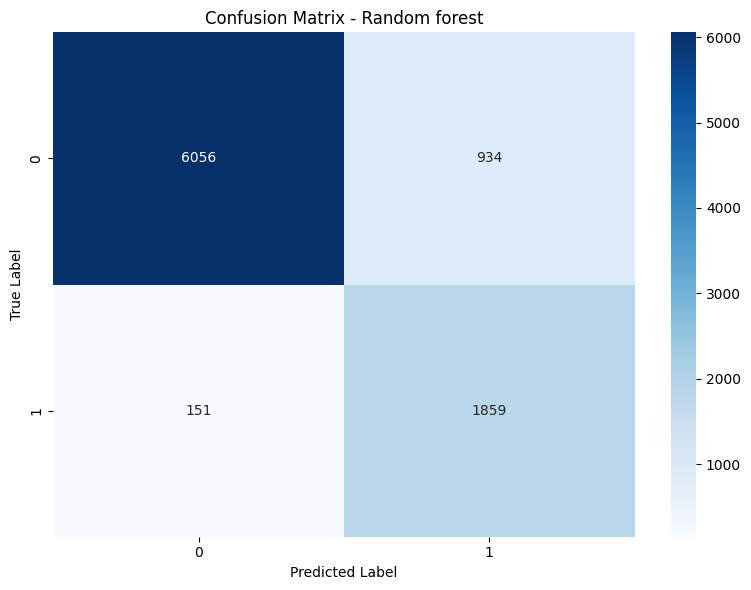


Gradient boosting Results:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.87      0.76      0.82      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.87      0.88      9000
weighted avg       0.92      0.92      0.92      9000



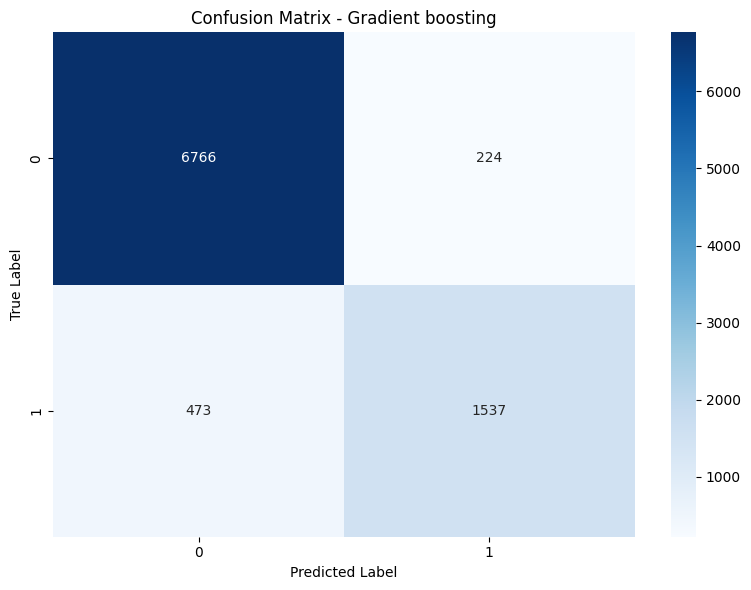


AdaBoost Results:
              precision    recall  f1-score   support

           0       0.94      0.94      0.94      6990
           1       0.78      0.79      0.78      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.86      0.86      9000
weighted avg       0.90      0.90      0.90      9000



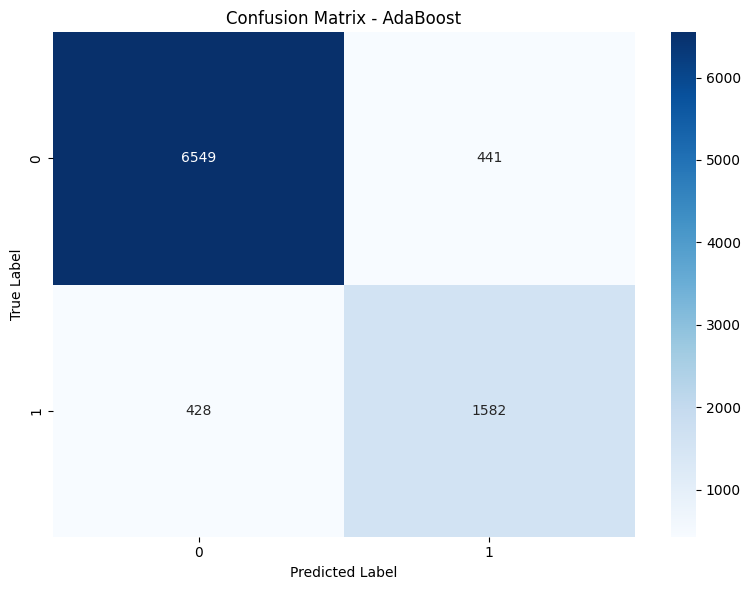


Bagging Results:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      6990
           1       0.79      0.74      0.76      2010

    accuracy                           0.90      9000
   macro avg       0.86      0.84      0.85      9000
weighted avg       0.90      0.90      0.90      9000



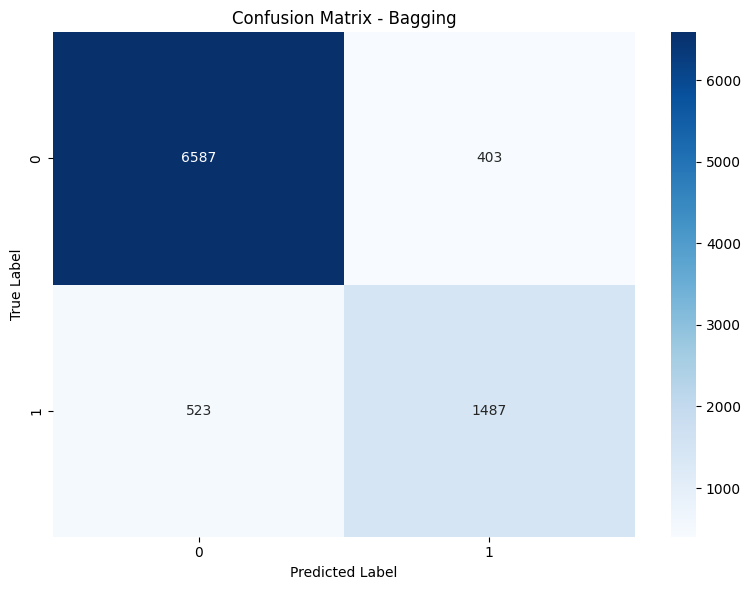


Voting classifier Results:
              precision    recall  f1-score   support

           0       0.96      0.90      0.93      6990
           1       0.73      0.88      0.79      2010

    accuracy                           0.90      9000
   macro avg       0.84      0.89      0.86      9000
weighted avg       0.91      0.90      0.90      9000



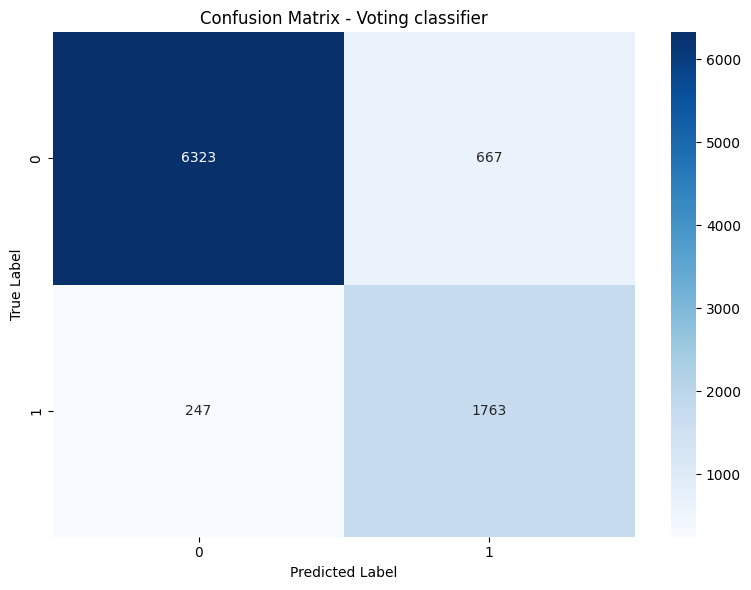


Deep learning Results:
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      6990
           1       0.86      0.76      0.81      2010

    accuracy                           0.92      9000
   macro avg       0.90      0.86      0.88      9000
weighted avg       0.92      0.92      0.92      9000



In [30]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.ensemble import  (
    RandomForestClassifier,
    GradientBoostingClassifier,
    AdaBoostClassifier,
    VotingClassifier,
    BaggingClassifier
)

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_curve,
    roc_auc_score,
    precision_recall_curve,
    average_precision_score
)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

def advanced_loan_classification(X_, y):

    X_train, X_test, y_train, y_test = train_test_split(X_, y, test_size=0.2, random_state=42)

    rf = RandomForestClassifier(
        n_estimators=100,
        max_depth=10,
        random_state=42,
        class_weight='balanced'
    )

    gb = GradientBoostingClassifier(
        n_estimators=100,
        learning_rate=0.1,
        max_depth=3,
        random_state=42
    )

    ada = AdaBoostClassifier(
        n_estimators=50,
        learning_rate=1.0,
        random_state=42
    )

    bagging = BaggingClassifier(
        estimator=LogisticRegression(),
        n_estimators=10,
        random_state=42
    )

    voting = VotingClassifier(
        estimators=[
            ('rf', rf),
            ('gb', gb),
            ('lr', LogisticRegression(class_weight='balanced'))
        ],
        voting='soft'
    )

    def create_deep_model(input_shape):
        model = Sequential([

            Dense(64, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(32, activation='relu'),
            Dropout(0.2),
            Dense(len(np.unique(y)), activation='softmax')
        ])
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )

        return model
    y_train_cat = to_categorical(y_train)
    y_test_cat = to_categorical(y_test)

    dl_model = create_deep_model(X_train.shape[1])

    early_stopping = EarlyStopping(
        monitor='val_loss',
        patience=10,
        restore_best_weights=True
    )

    models = {
        'Random forest' : rf,
        'Gradient boosting' : gb,
        'AdaBoost' : ada,
        'Bagging' : bagging,
        'Voting classifier' : voting,
        'Deep learning' : dl_model
    }

    results = {}

    for name, model in models.items():
        if name == 'Deep learning':
            history = model.fit(
                X_train, y_train_cat,
                validation_split=0.2,
                epochs=100,
                batch_size=32,
                callbacks=[early_stopping],
                verbose=0
            )

            y_pred_prob = model.predict(X_test)
            y_pred = np.argmax(y_pred_prob, axis=1)

            results[name] = {
                'accuracy' : model.evaluate(X_test, y_test_cat)[1],
                'classification_report' : classification_report(
                    y_test, y_pred
                )
            }

        else:
            cv_scores = cross_val_score(
                model, X_, y,
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            )

            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

            results[name] = {
                'cv_scores' : cv_scores,
                'mean_cv_score' : cv_scores.mean(),
                'classification_report' : classification_report(
                    y_test, y_pred
                )
            }

    def plot_confusion_matrix(y_true, y_pred, title):
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.title(f'Confusion Matrix - {title}')
        plt.ylabel('True Label')
        plt.xlabel('Predicted Label')
        plt.tight_layout()
        plt.show()
    def plot_roc_curve(y_true, y_scores, title):
        plt.figure(figsize=(8, 6))
        fpr, tpr, _ = roc_curve(y_true, y_scores)
        auc = roc_auc_score(y_true, y_scores)
        plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
        plt.plot([0, 1], [0, 1], linestyle='--')
        plt.title(f'ROC Curve - {title}')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.legend()
        plt.tight_layout()
        plt.show()
    for name, model_results in results.items():
        print(f"\n{name} Results:")
        print(model_results['classification_report'])

        # Confusion Matrix (for non-deep learning models)
        if name != 'Deep learning':
            plot_confusion_matrix(y_test,
                models[name].predict(X_test),
                name
            )

    return results

results = advanced_loan_classification(X_, y)

Best Accuracy:
- Both Gradient boosting and Deep larning models achieved the highest overall accuracy at 92%, making them strong general performers.

Best at Identifying Class 1 (Minority Class):
- Gradient boosting stands out with the highest F1-score (0.82) for class 1, performing a great job of balancing precision and recall for the harder-to-predict positive cases.

Best at Identifying Class 0 (Majority Class):
- Random forest is great at classifying class 0, with excellent precision and recall. However, it struggles more with class 1, meaning it misses some positive cases.

Balanced Performance with Voting Classifier:
- The Voting classifier combines strengths from multiple models, doing well overall, especially with its ability to catch class 1 cases (good recall).